# California Housing

## 1. 데이터 로드
캘리포니아 주택 데이터 셋을 로드하자

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

#데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


## 2. 데이터 기본 정보 확인
데이터의 기본 정보를 확인해서 데이터 구조, 변수 타입, 누락된 값 등을 파악한다.

In [6]:
# 데이터프레임의 기본 정보
print(df.info())

# 기술 통계 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

## 3. 데이터 시각화
데이터의 분포와 변수 간의 관계를 시각화하여 이해하자

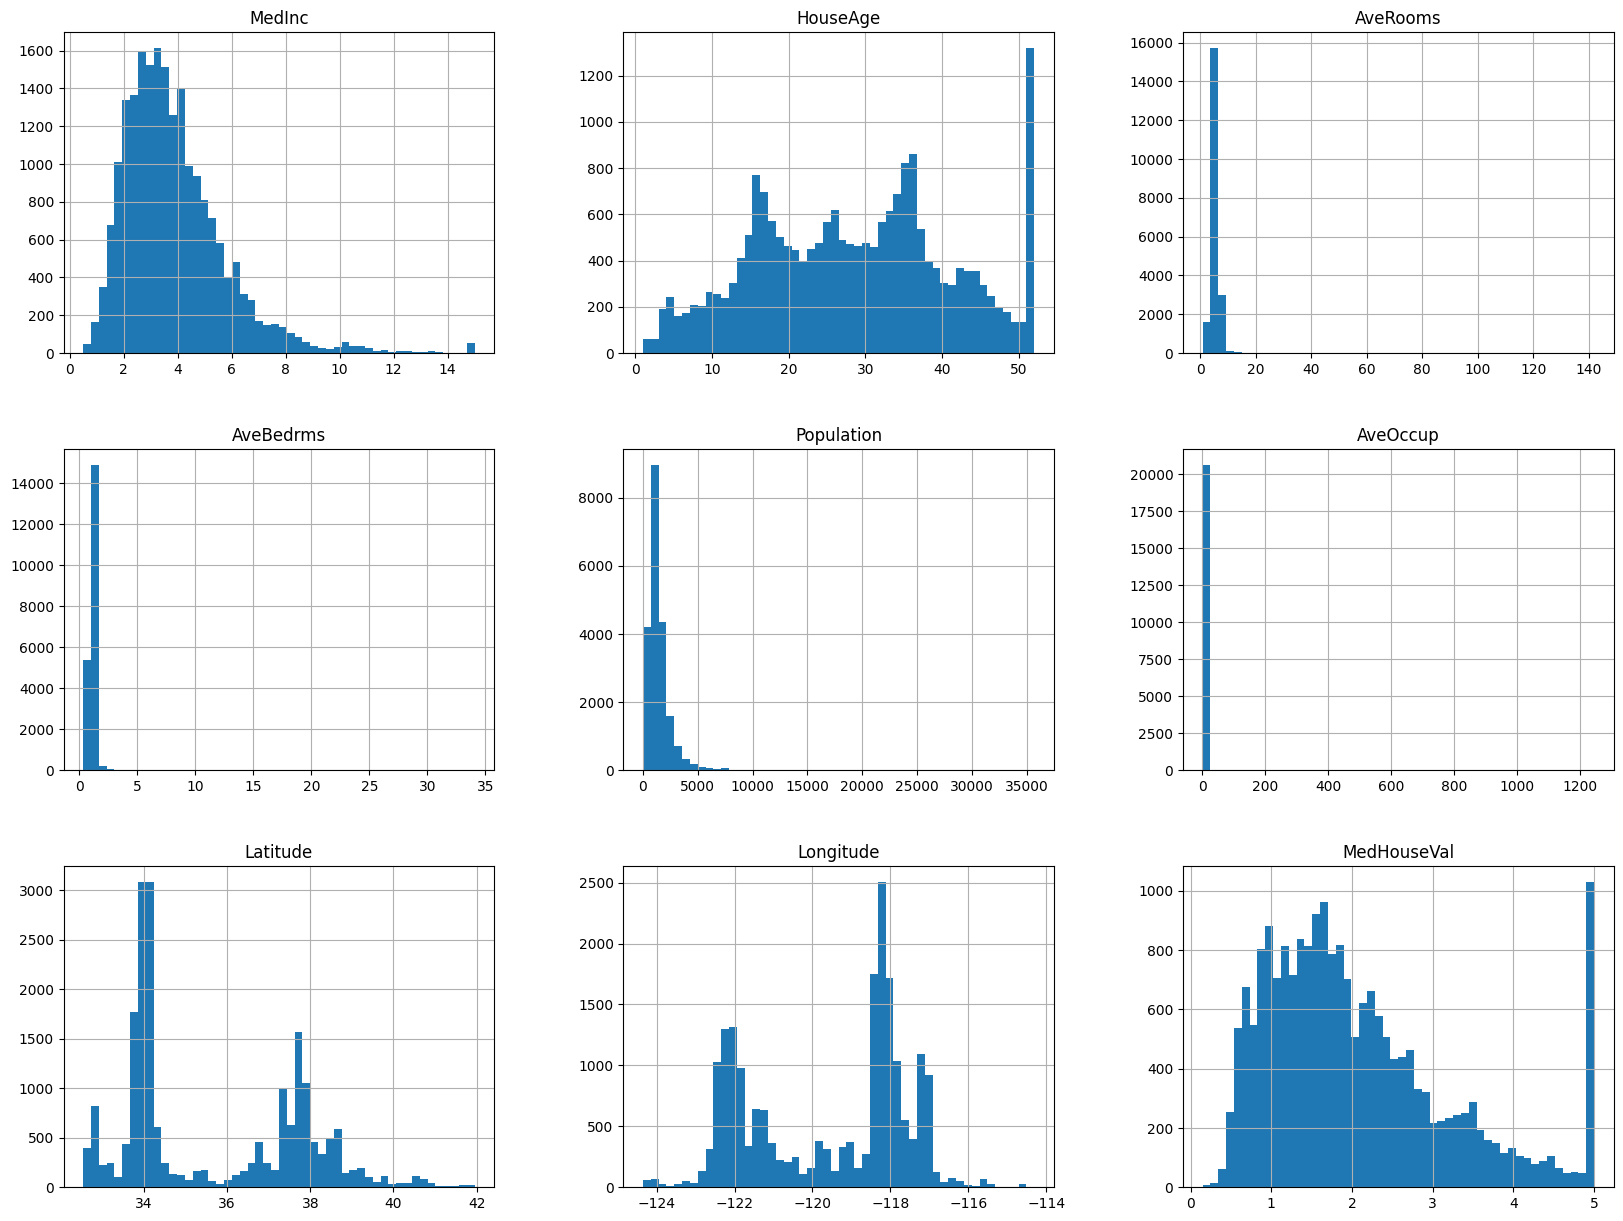

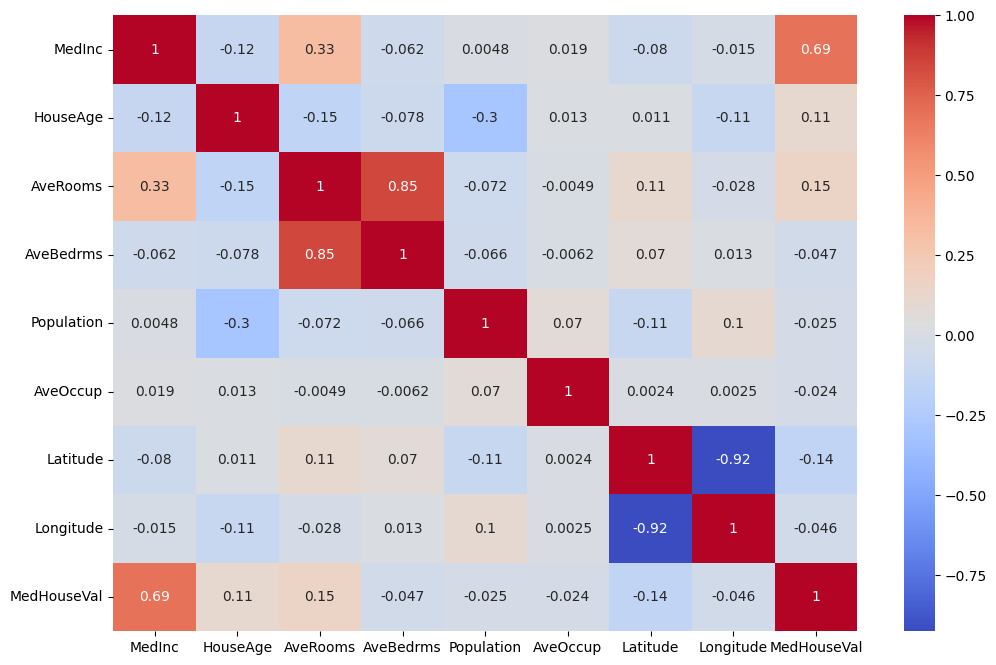

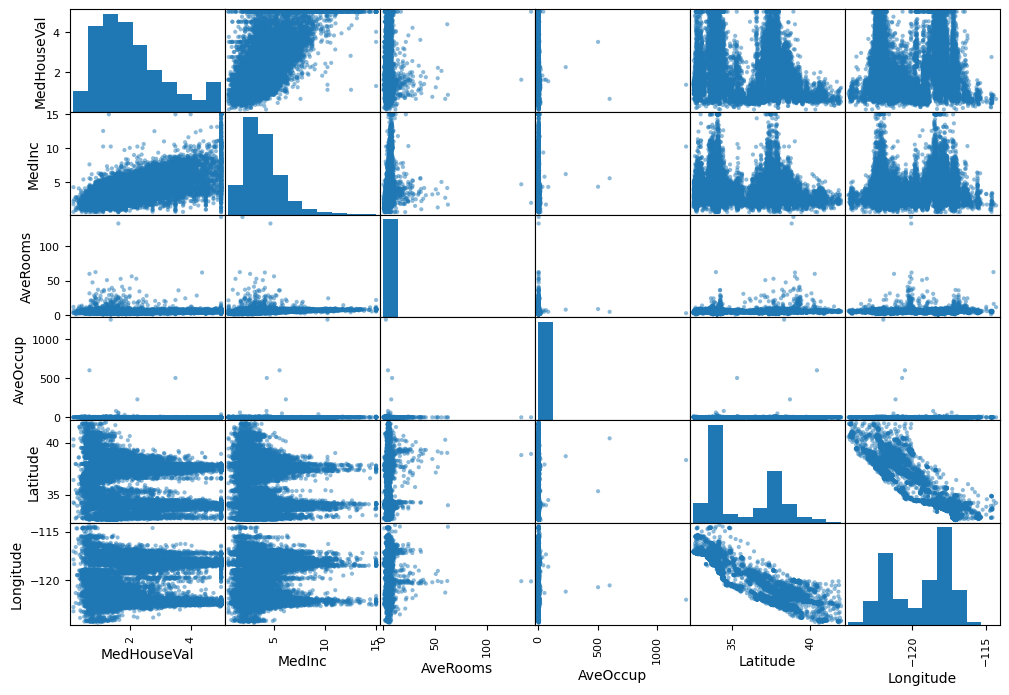

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 변수의 히스토그램
df.hist(bins=50, figsize=(20, 15))
plt.show()

# 상관 행렬 및 히트맵
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 주택 가격과 다른 변수들 간의 관계 (산점도)
attributes = ["MedHouseVal", "MedInc", "AveRooms", "AveOccup", "Latitude", "Longitude"]
scatter_matrix = pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

## 4. 변수 간의 관계 상세 분석
특정 변수들과 타겟 변수 간의 관계를 상세히 분석

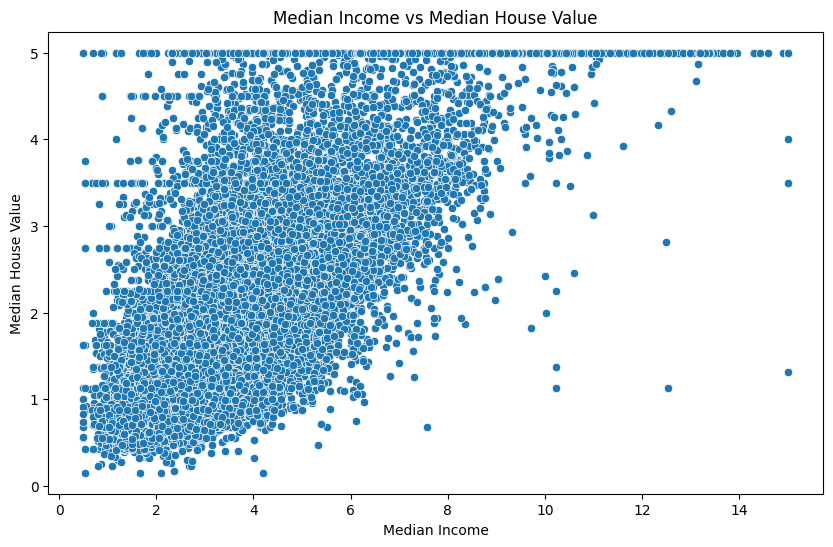

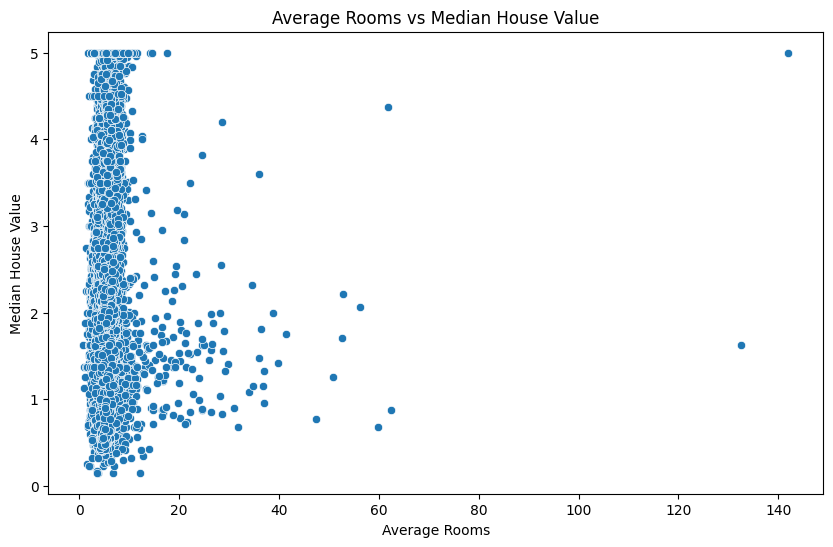

In [12]:
# 주택 가격과 평균 소득 간의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# 주택 가격과 평균 방 수 간의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df)
plt.title('Average Rooms vs Median House Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.show()

## 5. 지리적 데이터 시각화
위도와 경도를 이용해 주택 가격의 지리적 분포를 시각화 한다.

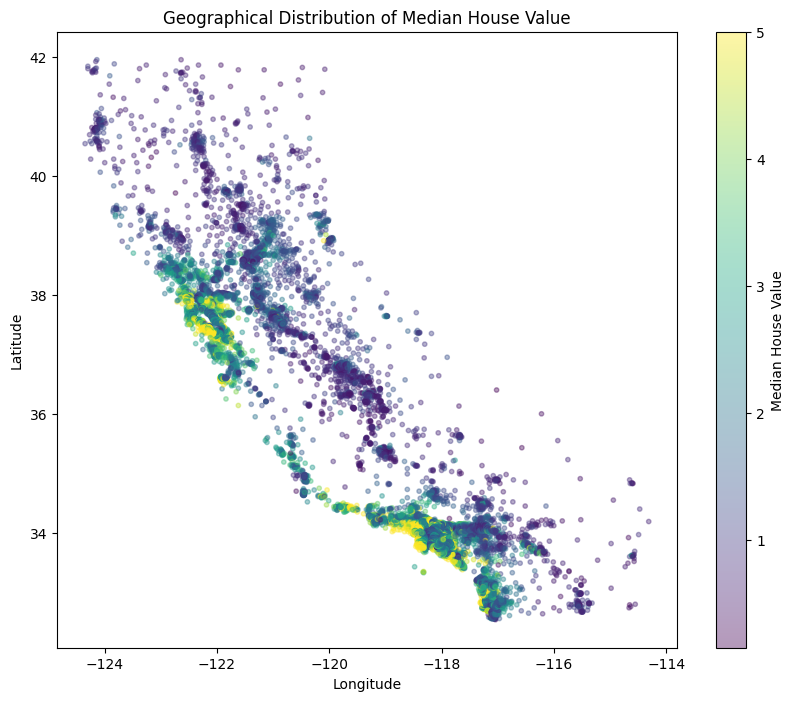

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.4,
            c=df['MedHouseVal'], cmap='viridis', s=10)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')
plt.show()